# Homework 5/ Dionisis Kotzaitsis 



> MNIST



# Libraries Loading

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



import tensorflow.keras.layers as layers

# Data Loading

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y before (10000,)
y after (10000, 10)


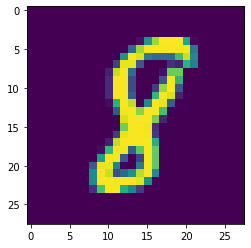

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print('y before', y_test.shape)

# convert class vectors to binary class matrices (one-hot)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y after', y_test.shape)


# show a random image
rand_index = np.random.choice(x_train.shape[0])
rand_img = x_train[rand_index]
plt.imshow(rand_img.reshape(28, 28))

# Model Building

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [ ]:
epochs = 5
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 3s 4ms/step - loss: 1.2186 - accuracy: 0.7079 - val_loss: 0.6395 - val_accuracy: 0.8705
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.5846 - accuracy: 0.8568 - val_loss: 0.4270 - val_accuracy: 0.9017
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.4604 - accuracy: 0.8792 - val_loss: 0.3573 - val_accuracy: 0.9085
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.4064 - accuracy: 0.8904 - val_loss: 0.3199 - val_accuracy: 0.9160
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.3745 - accuracy: 0.8971 - val_loss: 0.2975 - val_accuracy: 0.9230


# Evaluate the Model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.33997657895088196
Test accuracy: 0.9043999910354614


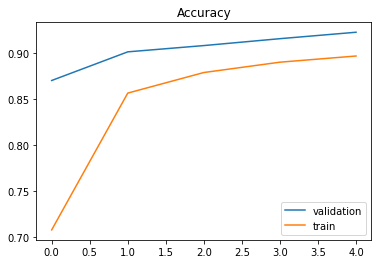

In [ ]:
plt.plot(history.history['val_accuracy'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()

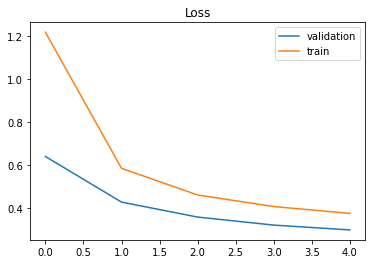

In [ ]:
plt.plot(history.history['val_loss'], label='validation')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.legend()

# Ερώτηματα για MNIST






# Ερώτημα 1


> Στο τρεχον μοντέλο, προσθέτουμε την διαδικασία του standardization. Εκεί, για τα δεδομένα εκπαίδευσης, βρίσκουμε τον μέσο όρο και την τυπική απόκλιση του train set και κάνουμε (data-mean)/std. 

In [ ]:
# Data Loading
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# standardize
mean=np.mean(x_train)
std=np.std(x_train)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print('y before', y_test.shape)

# convert class vectors to binary class matrices (one-hot)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y after', y_test.shape)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y before (10000,)
y after (10000, 10)


In [ ]:
# Model Building
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Training

epochs = 5
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.6157 - accuracy: 0.8221 - val_loss: 0.3012 - val_accuracy: 0.9187
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.3304 - accuracy: 0.9054 - val_loss: 0.2446 - val_accuracy: 0.9327
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2810 - accuracy: 0.9201 - val_loss: 0.2163 - val_accuracy: 0.9407
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2510 - accuracy: 0.9291 - val_loss: 0.2005 - val_accuracy: 0.9453
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2291 - accuracy: 0.9351 - val_loss: 0.1828 - val_accuracy: 0.9513


Test loss: 0.21160639822483063
Test accuracy: 0.9386000037193298


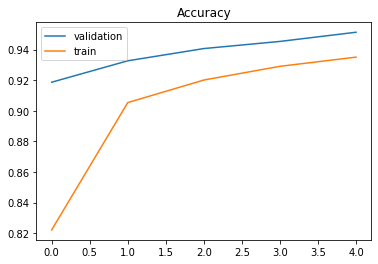

In [ ]:
# Model evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history.history['val_accuracy'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()



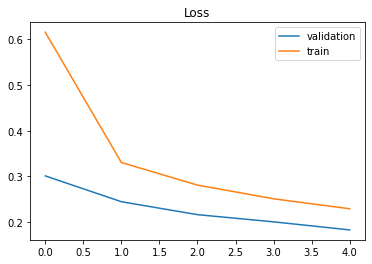

In [ ]:
plt.plot(history.history['val_loss'], label='validation')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.legend()

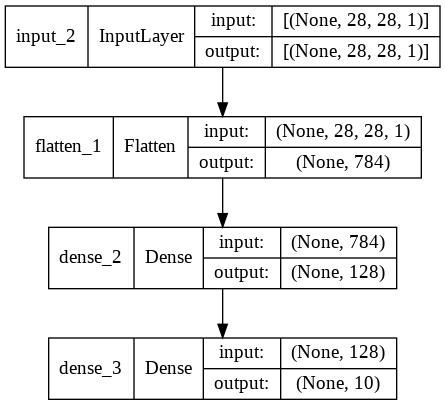

In [ ]:
# model plotting
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# Ερώτημα 2

In [ ]:
# Model Building
adam_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

adam_model.summary()
sgd_w_m=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.8,nesterov=True)

momentum_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
momentum_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)          

In [ ]:

# Model train
epochs = 5
batch_size = 128

print('Adam model\n')
adam_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_ad = adam_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Momentum model\n')

momentum_model.compile(loss="categorical_crossentropy", optimizer=sgd_w_m, metrics=["accuracy"])

history_m = momentum_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)




Adam model

Epoch 1/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2921 - accuracy: 0.9128 - val_loss: 0.1267 - val_accuracy: 0.9643
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.1242 - accuracy: 0.9626 - val_loss: 0.0939 - val_accuracy: 0.9732
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0847 - accuracy: 0.9749 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.0925 - val_accuracy: 0.9727
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0817 - val_accuracy: 0.9778
Momentum model

Epoch 1/5
422/422 [==============================] - 2s 4ms/step - loss: 2.0514 - accuracy: 0.3092 - val_loss: 1.4456 - val_accuracy: 0.5757
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 1.2306 - accuracy: 0.6503 - val_loss: 0.9719 - val_ac

Test loss: 0.08076745271682739
Test accuracy: 0.975600004196167


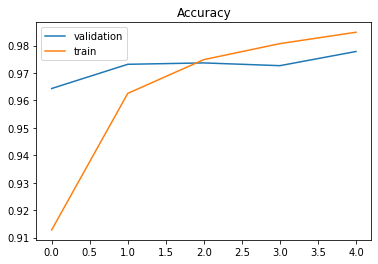

In [ ]:
# Adam Model evaluation
score_ad = adam_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_ad[0])
print("Test accuracy:", score_ad[1])

plt.plot(history_ad.history['val_accuracy'], label='validation')
plt.plot(history_ad.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()



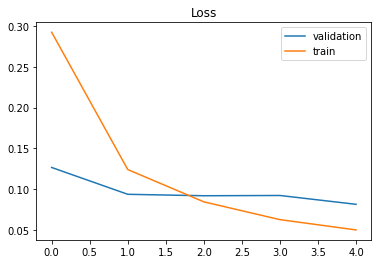

In [ ]:
plt.plot(history_ad.history['val_loss'], label='validation')
plt.plot(history_ad.history['loss'], label='train')
plt.title('Loss')
plt.legend()

Test loss: 0.5925115346908569
Test accuracy: 0.8398000001907349


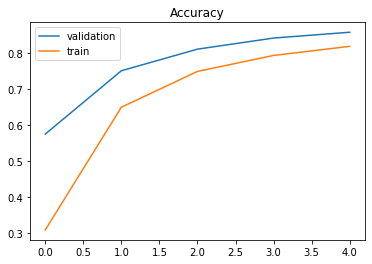

In [ ]:
# Momentum Model evaluation
score_mom = momentum_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_mom[0])
print("Test accuracy:", score_mom[1])

plt.plot(history_m.history['val_accuracy'], label='validation')
plt.plot(history_m.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()



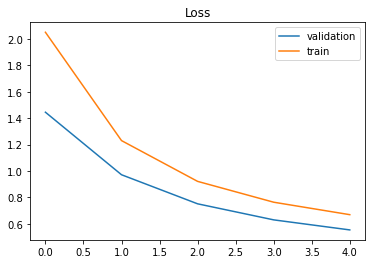

In [ ]:
plt.plot(history_m.history['val_loss'], label='validation')
plt.plot(history_m.history['loss'], label='train')
plt.title('Loss')
plt.legend()

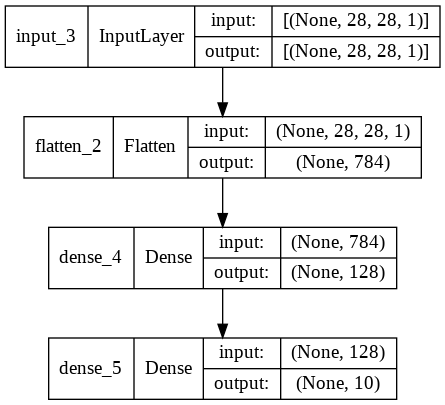

In [ ]:
# Model Plotting

tf.keras.utils.plot_model(adam_model, show_shapes=True, show_layer_names=True)


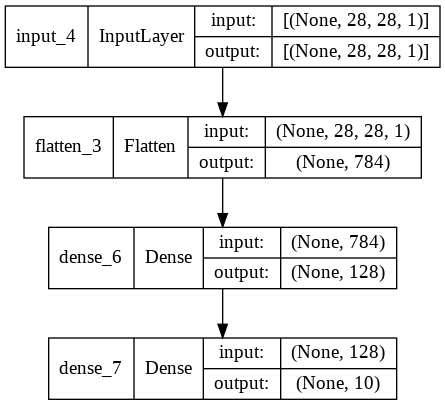

In [ ]:
tf.keras.utils.plot_model(momentum_model, show_shapes=True, show_layer_names=True)

Τα αποτελέσματα που λαμβάνουμε δείχνουν μια εξαιρετική ακρίβεια του μοντέλου Adam κατα την κατασκευή του δικτύου, αλλά και την και ραγδαία μείωση της συνάρτησης λάθους, και για το train και το test σετ δεδομένων. Αυτό συμβαίνει, καθώς ο Adam είναι optimized βελτιστοποιητής, εξειδικευμένος για τέτοιου είδους προβλήματα.

Οσο αναφορά το SGD με momentum, τα αποτελέσματα είναι λίγο πολύ φυσιολογικά, δεδομένου ότι ο ρυθμός εκμάθησής που βάλαμε είναι πολύ μικρός (l_r=0.0001). Έτσι, υπάρχει μια μικρή, αλλα σταδιακή ελαχιστοποίηση της loss function, με ταυτόχρονη αύξηση της ακρίβειας του μοντέλου. 

# Ερώτημα 3

In [ ]:
# Model Building
wider_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(256, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
deeper_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(256, activation="relu"),
        layers.Dense(158, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
bigger_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Model presentation

In [ ]:
# Model train
epochs = 5
batch_size = 128

print('Wider model\n')
wider_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_wd = wider_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Deeper model\n')

deeper_model.compile(loss="categorical_crossentropy", optimizer=sgd_w_m, metrics=["accuracy"])

history_dp = deeper_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Bigger model\n')

bigger_model.compile(loss="categorical_crossentropy", optimizer=sgd_w_m, metrics=["accuracy"])

history_bg = bigger_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Wider model

Epoch 1/5
422/422 [==============================] - 3s 6ms/step - loss: 0.2550 - accuracy: 0.9238 - val_loss: 0.1107 - val_accuracy: 0.9687
Epoch 2/5
422/422 [==============================] - 2s 6ms/step - loss: 0.1019 - accuracy: 0.9696 - val_loss: 0.0889 - val_accuracy: 0.9763
Epoch 3/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0662 - accuracy: 0.9801 - val_loss: 0.0819 - val_accuracy: 0.9768
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0806 - val_accuracy: 0.9778
Epoch 5/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0777 - val_accuracy: 0.9797
Deeper model

Epoch 1/5
422/422 [==============================] - 4s 8ms/step - loss: 2.0700 - accuracy: 0.3108 - val_loss: 1.5763 - val_accuracy: 0.5498
Epoch 2/5
422/422 [==============================] - 3s 6ms/step - loss: 1.3387 - accuracy: 0.6376 - val_loss: 1.0781 - val_acc

Test loss: 0.06883250921964645
Test accuracy: 0.9785000085830688


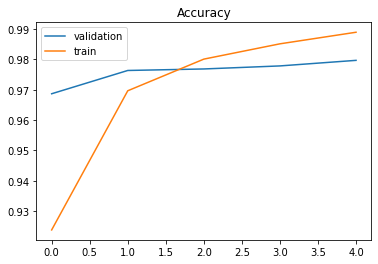

In [ ]:
# Wider model Eval  
score_wd = wider_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_wd[0])
print("Test accuracy:", score_wd[1])

plt.plot(history_wd.history['val_accuracy'], label='validation')
plt.plot(history_wd.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()




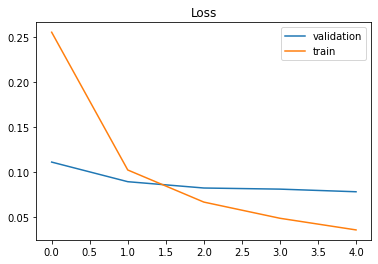

In [ ]:
plt.plot(history_wd.history['val_loss'], label='validation')
plt.plot(history_wd.history['loss'], label='train')
plt.title('Loss')
plt.legend()

Test loss: 0.6181263327598572
Test accuracy: 0.8413000106811523


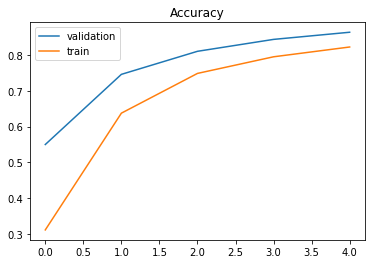

In [ ]:
# Deeper model Eval
  
score_dp = deeper_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_dp[0])
print("Test accuracy:", score_dp[1])

plt.plot(history_dp.history['val_accuracy'], label='validation')
plt.plot(history_dp.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()


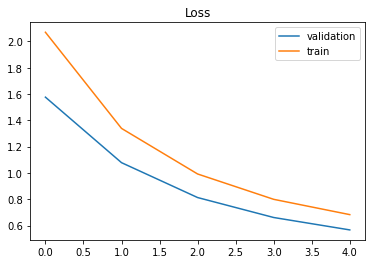

In [ ]:

plt.plot(history_dp.history['val_loss'], label='validation')
plt.plot(history_dp.history['loss'], label='train')
plt.title('Loss')
plt.legend()

Test loss: 0.7480796575546265
Test accuracy: 0.8069999814033508


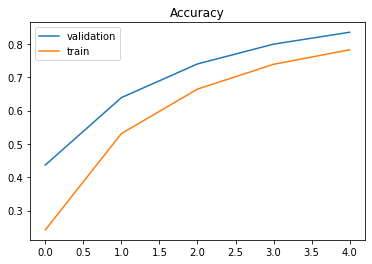

In [ ]:
# Bigger model Eval

score_bg = bigger_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_bg[0])
print("Test accuracy:", score_bg[1])

plt.plot(history_bg.history['val_accuracy'], label='validation')
plt.plot(history_bg.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()



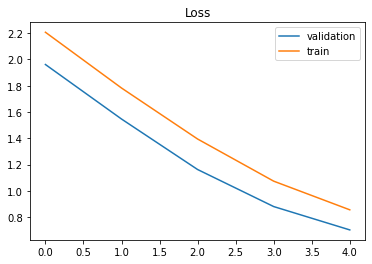

In [ ]:
plt.plot(history_bg.history['val_loss'], label='validation')
plt.plot(history_bg.history['loss'], label='train')
plt.title('Loss')
plt.legend()

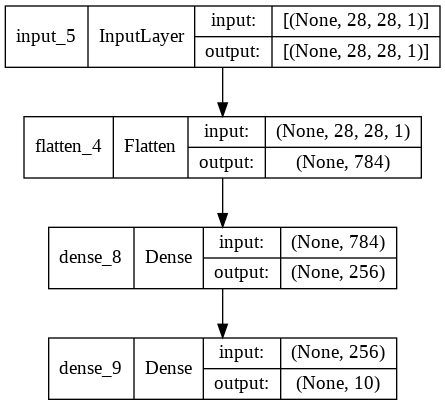

In [ ]:
# Plotting Wider
tf.keras.utils.plot_model(wider_model, show_shapes=True, show_layer_names=True)

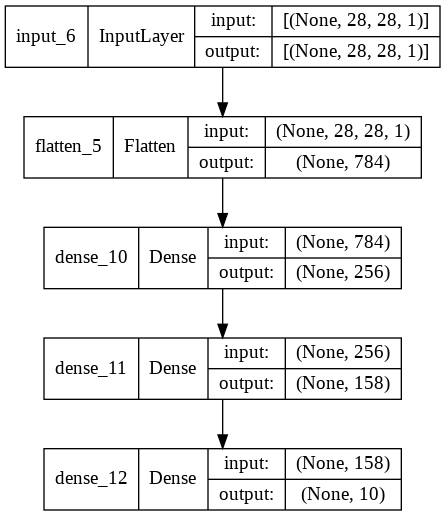

In [ ]:
# Plotting deeper
tf.keras.utils.plot_model(deeper_model, show_shapes=True, show_layer_names=True)

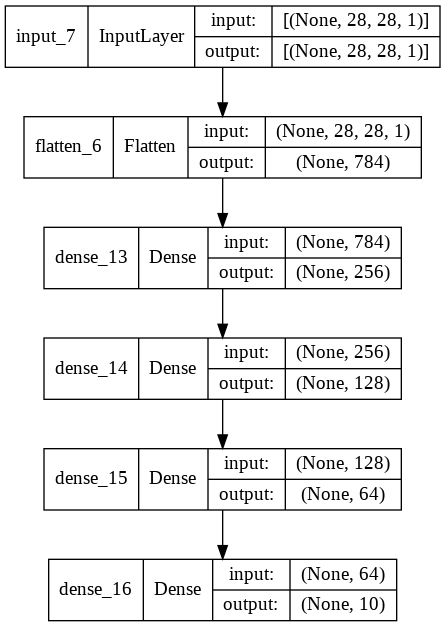

In [ ]:
# Plotting bigger
tf.keras.utils.plot_model(bigger_model, show_shapes=True, show_layer_names=True)

Κατασκευάσαμε 3 νέα δίκτυα. Στην πρώτη περίπτωση, "πλατύναμε το δίκτυο", βάζοντας αντί για 128 νευρώνες, 256 στο κρυφό επίπεδο.
Τα αποτελέσματα είναι εξαιρετικά, καθώς φαίνεται να καταλαβαίνει πιο άμεσα τις συσχετίσεις των αντικειμένων, και να τα κατηγοριοποιεί με μεγαλύτερη ακρίβεια στις κατηγορίες, ενώ το όλο δίκτυο βελτιστοποιεί καλύτερα την loss function.


Επιπλέον, κατασκευάσαμε 2 ακόμα δίκτυα. Ένα πιο βαθύ, το οποίο προσθέσαμε ένα δεύτερον κρυφό επίπεδο 128 νευρώνων. Και ένα γενικά μεγαλύτερο δίκτυο, με 2 κρυφά επίπεδα της τάξεως των 128 και 64 νευρώνων αντίστοιχα. Τα δύο αυτά ν.δ., δεν επιδυκνύουν την κατάλληλη ακρίβεια, τουλάχιστον στις 5 πρώτες γενίες μάθησης. Παρ'ολα αυτά εμφανίζεται μια σχεδόν γραμμική μείωση της loss function, ενώ παράλληλα αύξηση της ακρίβειας.

# Ερωτήματα για Fashion-MNIST.





> F-MNIST



4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


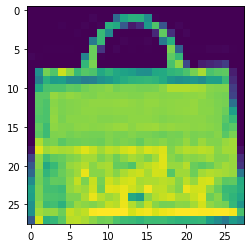

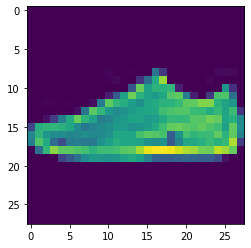

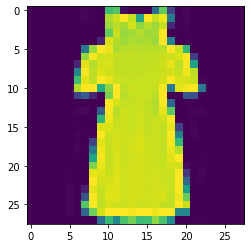

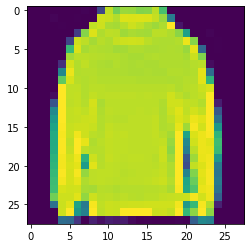

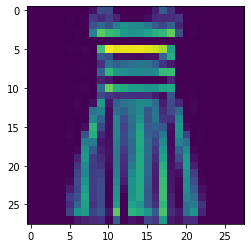

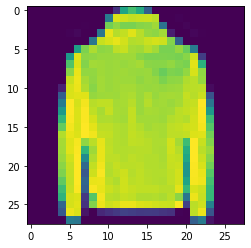

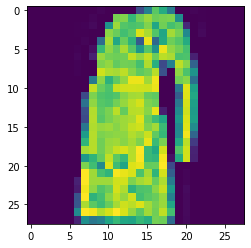

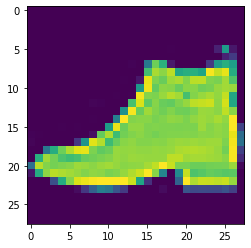

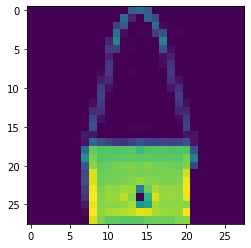

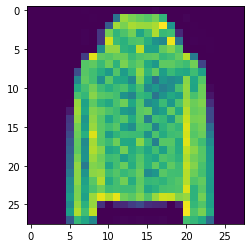

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# show 10 random images
for i in range(10):
  rand_index = np.random.choice(x_train.shape[0])
  rand_img = x_train[rand_index]
  plt.figure()
  plt.imshow(rand_img.reshape(28, 28))

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 15
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 1.1442 - accuracy: 0.6484 - val_loss: 0.7884 - val_accuracy: 0.7455
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.7236 - accuracy: 0.7661 - val_loss: 0.6564 - val_accuracy: 0.7823
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.6283 - accuracy: 0.7972 - val_loss: 0.5942 - val_accuracy: 0.7997
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.5777 - accuracy: 0.8118 - val_loss: 0.5572 - val_accuracy: 0.8115
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.5456 - accuracy: 0.8203 - val_loss: 0.5385 - val_accuracy: 0.8163
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.5231 - accuracy: 0.8254 - val_loss: 0.5171 - val_accuracy: 0.8200
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.5061 - accuracy: 0.8300 - val_loss: 0.4997 - val_accuracy: 0.8292
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4667225182056427
Test accuracy: 0.8378000259399414


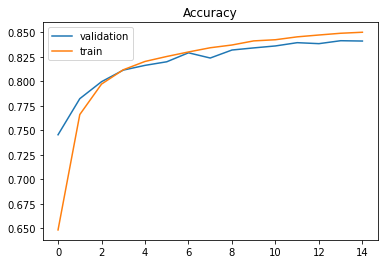

In [ ]:
plt.plot(history.history['val_accuracy'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()

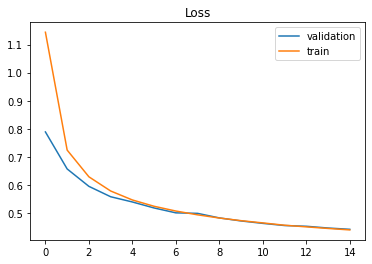

In [ ]:
plt.plot(history.history['val_loss'], label='validation')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.legend()

# Ερώτημα 1

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# standardize
mean=np.mean(x_train)
std=np.std(x_train)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std


# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Model Building
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 15
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.7387 - accuracy: 0.7483 - val_loss: 0.5434 - val_accuracy: 0.8073
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.5093 - accuracy: 0.8206 - val_loss: 0.4803 - val_accuracy: 0.8292
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4631 - accuracy: 0.8374 - val_loss: 0.4546 - val_accuracy: 0.8370
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4363 - accuracy: 0.8466 - val_loss: 0.4341 - val_accuracy: 0.8452
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4182 - accuracy: 0.8531 - val_loss: 0.4207 - val_accuracy: 0.8495
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4034 - accuracy: 0.8571 - val_loss: 0.4098 - val_accuracy: 0.8528
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3918 - accuracy: 0.8620 - val_loss: 0.4025 - val_accuracy: 0.8555
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3924379348754883
Test accuracy: 0.8593999743461609


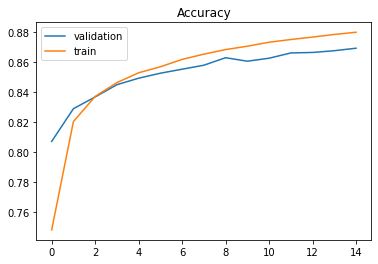

In [ ]:
plt.plot(history.history['val_accuracy'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()



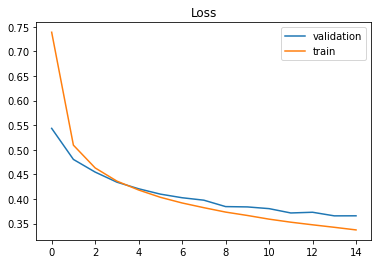

In [ ]:
plt.plot(history.history['val_loss'], label='validation')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.legend()

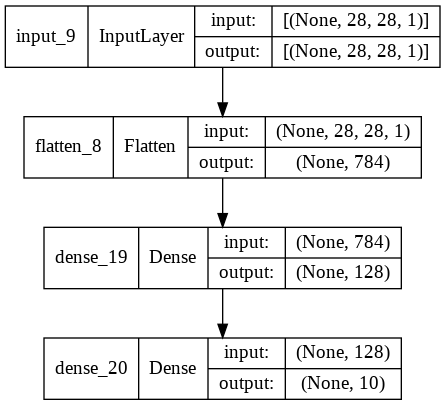

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# Ερωτημα 2

In [ ]:
# Model Building
adam_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

adam_model.summary()
sgd_w_m=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.8,nesterov=True)

momentum_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
momentum_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)        

In [ ]:
# Model train
epochs = 15
batch_size = 128

print('Adam model\n')
adam_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_ad = adam_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Momentum model\n')

momentum_model.compile(loss="categorical_crossentropy", optimizer=sgd_w_m, metrics=["accuracy"])

history_m = momentum_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)




Adam model

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4909 - accuracy: 0.8230 - val_loss: 0.4199 - val_accuracy: 0.8427
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3647 - accuracy: 0.8692 - val_loss: 0.3764 - val_accuracy: 0.8592
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3244 - accuracy: 0.8811 - val_loss: 0.3515 - val_accuracy: 0.8760
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2981 - accuracy: 0.8923 - val_loss: 0.3578 - val_accuracy: 0.8697
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2832 - accuracy: 0.8953 - val_loss: 0.3286 - val_accuracy: 0.8793
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2623 - accuracy: 0.9039 - val_loss: 0.3325 - val_accuracy: 0.8790
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2491 - accuracy: 0.9071 - val_loss: 0.3232 - val_accuracy: 0

Test loss: 0.36575043201446533
Test accuracy: 0.8831999897956848


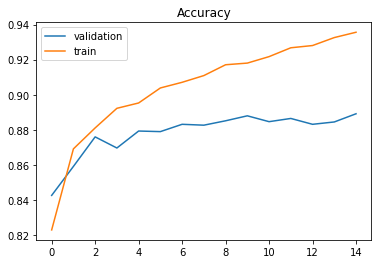

In [ ]:
# Adam Model evaluation
score_ad = adam_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_ad[0])
print("Test accuracy:", score_ad[1])

plt.plot(history_ad.history['val_accuracy'], label='validation')
plt.plot(history_ad.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()


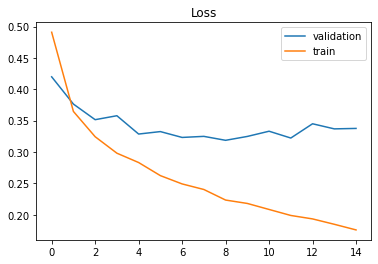

In [ ]:
plt.plot(history_ad.history['val_loss'], label='validation')
plt.plot(history_ad.history['loss'], label='train')
plt.title('Loss')
plt.legend()

Test loss: 0.5933367013931274
Test accuracy: 0.791700005531311


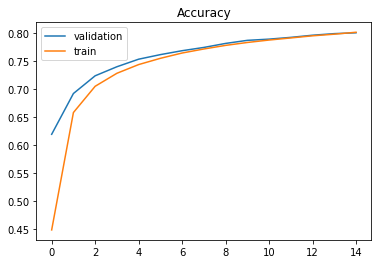

In [ ]:
# Momentum Model evaluation
score_mom = momentum_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_mom[0])
print("Test accuracy:", score_mom[1])

plt.plot(history_m.history['val_accuracy'], label='validation')
plt.plot(history_m.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()

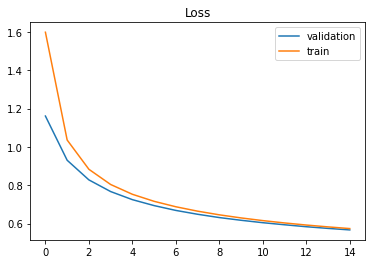

In [ ]:
plt.plot(history_m.history['val_loss'], label='validation')
plt.plot(history_m.history['loss'], label='train')
plt.title('Loss')
plt.legend()

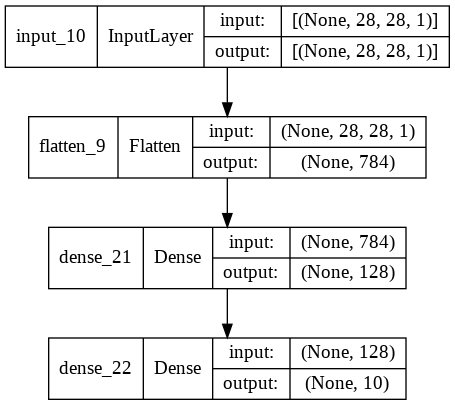

In [ ]:
# Model Plotting

tf.keras.utils.plot_model(adam_model, show_shapes=True, show_layer_names=True)

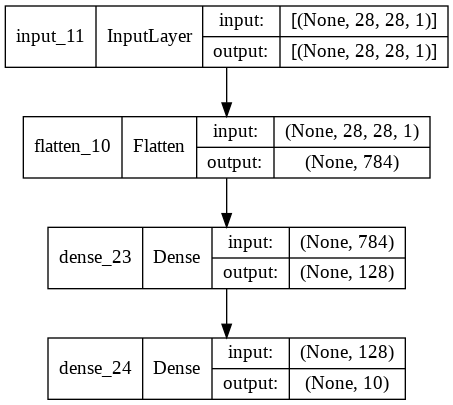

In [ ]:
tf.keras.utils.plot_model(momentum_model, show_shapes=True, show_layer_names=True)

Όπως και στο MNIST, βλέπουμε απ τα διαγράμματα για το SGD με momentum οτι η εκμάθηση των δεδομένων είναι πιό ομαλή, λόγω μικρού ρυθμού μάθησης. Απ' την άλλη, όπως προαναφέρθηκε, στο Adam έχουμε μεγάλα ποσοστά ακρίβειας και στο σύνολο εκμάθησης και στο σύνολο δοκιμής, οπου η τιμή του accuracy "ταλαντώνεται" περι το 88%.

# Ερωτηση 3


In [ ]:
# Model Building
wider_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(256, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
deeper_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(256, activation="relu"),
        layers.Dense(158, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
bigger_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Flatten(), # from 28x28x1 => 784x1
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
# Model train
epochs = 15
batch_size = 128

print('Wider model\n')
wider_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_wd = wider_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Deeper model\n')

deeper_model.compile(loss="categorical_crossentropy", optimizer=sgd_w_m, metrics=["accuracy"])

history_dp = deeper_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Bigger model\n')

bigger_model.compile(loss="categorical_crossentropy", optimizer=sgd_w_m, metrics=["accuracy"])

history_bg = bigger_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Wider model

Epoch 1/15
422/422 [==============================] - 3s 7ms/step - loss: 0.4697 - accuracy: 0.8312 - val_loss: 0.3911 - val_accuracy: 0.8565
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.3512 - accuracy: 0.8740 - val_loss: 0.3416 - val_accuracy: 0.8762
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.3099 - accuracy: 0.8867 - val_loss: 0.3370 - val_accuracy: 0.8773
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.2845 - accuracy: 0.8950 - val_loss: 0.3409 - val_accuracy: 0.8803
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.2633 - accuracy: 0.9036 - val_loss: 0.3233 - val_accuracy: 0.8848
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2496 - accuracy: 0.9080 - val_loss: 0.3316 - val_accuracy: 0.8757
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.2317 - accuracy: 0.9144 - val_loss: 0.3149 - val_accuracy: 

Test loss: 0.3573325574398041
Test accuracy: 0.8907999992370605


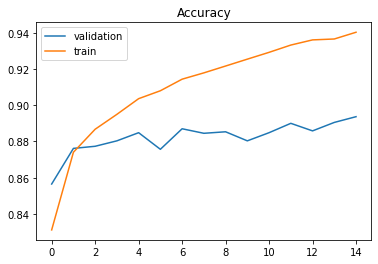

In [ ]:
# Wider model Eval  
score_wd = wider_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_wd[0])
print("Test accuracy:", score_wd[1])

plt.plot(history_wd.history['val_accuracy'], label='validation')
plt.plot(history_wd.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()



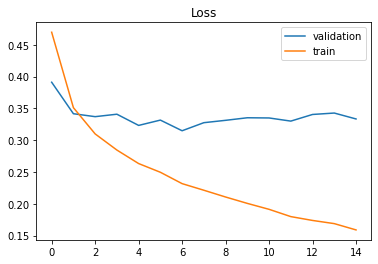

In [ ]:
plt.plot(history_wd.history['val_loss'], label='validation')
plt.plot(history_wd.history['loss'], label='train')
plt.title('Loss')
plt.legend()

Test loss: 0.5633477568626404
Test accuracy: 0.8008999824523926


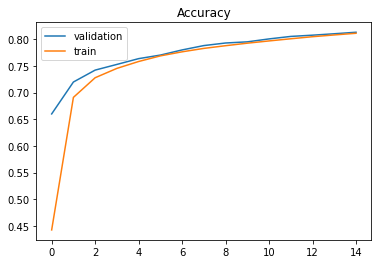

In [ ]:
# Deeper model Eval
  
score_dp = deeper_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_dp[0])
print("Test accuracy:", score_dp[1])

plt.plot(history_dp.history['val_accuracy'], label='validation')
plt.plot(history_dp.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()

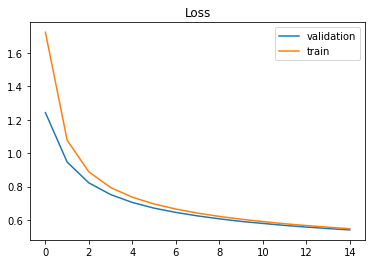

In [ ]:
plt.plot(history_dp.history['val_loss'], label='validation')
plt.plot(history_dp.history['loss'], label='train')
plt.title('Loss')
plt.legend()

Test loss: 0.5842066407203674
Test accuracy: 0.7943000197410583


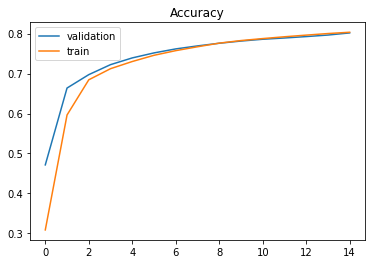

In [ ]:
# Bigger model Eval

score_bg = bigger_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_bg[0])
print("Test accuracy:", score_bg[1])

plt.plot(history_bg.history['val_accuracy'], label='validation')
plt.plot(history_bg.history['accuracy'], label='train')
plt.title('Accuracy')
plt.legend()

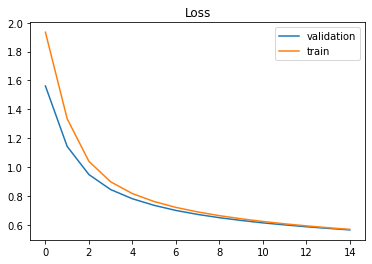

In [ ]:
plt.plot(history_bg.history['val_loss'], label='validation')
plt.plot(history_bg.history['loss'], label='train')
plt.title('Loss')
plt.legend()

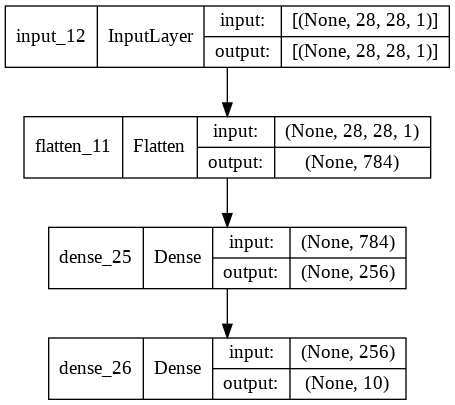

In [ ]:
# Plotting Wider
tf.keras.utils.plot_model(wider_model, show_shapes=True, show_layer_names=True)

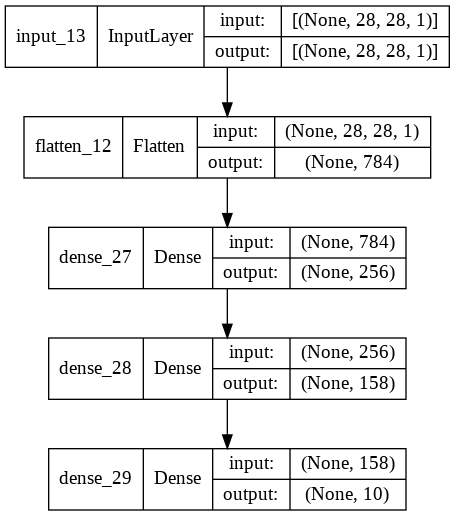

In [ ]:
# Plotting deeper 
tf.keras.utils.plot_model(deeper_model, show_shapes=True, show_layer_names=True)

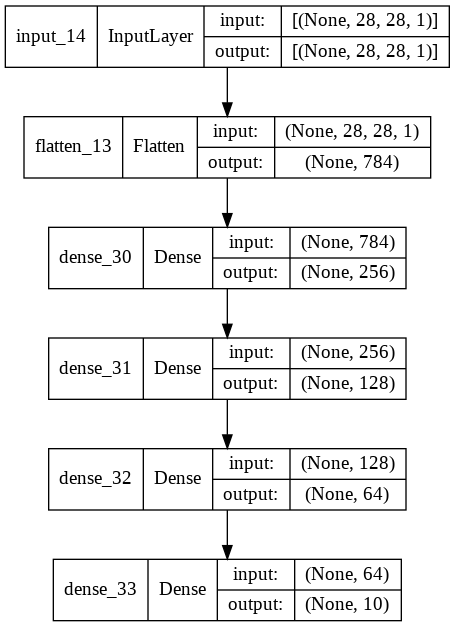

In [ ]:
# Plotting bigger 
tf.keras.utils.plot_model(bigger_model, show_shapes=True, show_layer_names=True)

Στην περίπτωση του Fashion- MNIST, για τα πιο σύνθετα δίκτυα. Το wider δίκτυο, φαίνεται να ελαχιστοποιεί σχετικά γρήγορα την loss function, και να αποκτά μια πολύ καλή ακρίβεια για τα δεδομένα train εξ αρχής. Τα deeper και bigger δίκτυα, ενώ ξεκινάνε με μικρή ακρίβεια, φαίνεται οτι μετά απο 15 γενίες εκμάθησης σταδιακά καταφέρνουν να μειώσουν επαρκώς την loss function και πίανουν μια αρκετά ικανοποιητική ακρίβεια στο 79 % περίπου.